In [1]:
import numpy as np
#importer d'autres fichiers et classes si vous en avez développés
from scrachnnet import helpers, DecisionTree, NeuralNet

In [14]:
dataset_names = ['iris', 'wine', 'abalone']
seedrange = 10
max_depth = 5
train_size = .7
min_samples_split = 4

datasets = helpers.dataset_loader(dataset_names, train_ratio=train_size)


## Arbre de decision

### 1-a

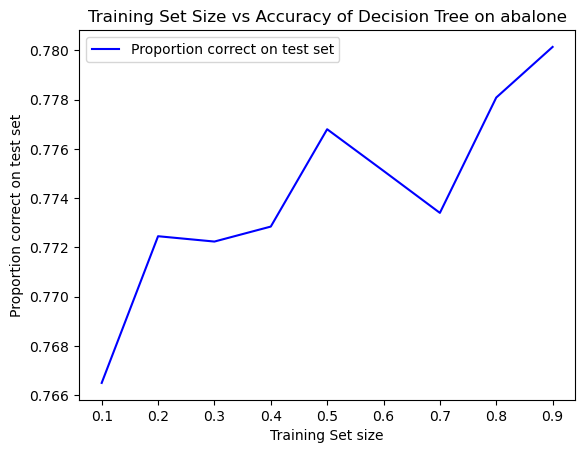

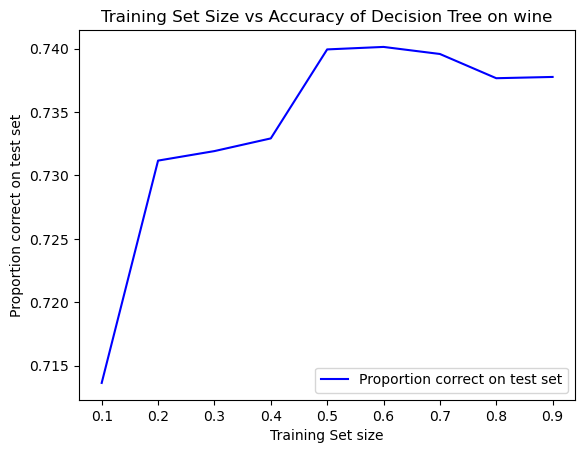

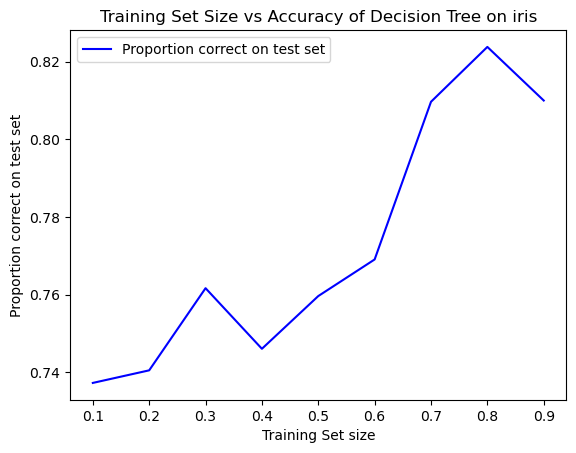

In [12]:
best_test_size = {}
for name, dataset in reversed(datasets.items()):
    dTree = DecisionTree.DecisionTree(max_depth, min_samples_split=min_samples_split, prunning=False)

    train, train_labels, test, test_labels, labels = dataset
    train, train_labels = dTree.fit_transform(train.astype(float), train_labels.astype(float))
    test, test_labels = dTree.transform(test.astype(float), test_labels.astype(float))

    accuracies = []
    test_size = []
    for size in range(1, 10):
        accuracy = []
        for seed in range(seedrange):

            X_train, X_test, y_train, y_test = helpers.train_test_split(train, train_labels, test_size=0.1 * size, random_state=seed)
            dTree.train(X_train, y_train)

            scores = dTree.evaluate(X_test, y_test)
            accuracy.append(scores[1])

        accuracies.append(np.mean(accuracy))
        test_size.append(1 - (0.1 * size))

    helpers.plot(
         test_size,
         accuracies,
         xlabel="Training Set size",
         ylabel="Proportion correct on test set",
         title=f"Training Set Size vs Accuracy of Decision Tree on {name}"
    )

    best_test_size[name] = test_size[accuracies.index(max(accuracies))]


## 1-b,c Training and test


Resultat pour dataset iris
Résultat global sur le test set:
Accuracy: 0.7111111111111111
Précision: 0.75
Rappel: 0.7330316742081449
F1-score: 0.7414187643020596



Résultat par class sur le test set:
Class 0:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Class 1:
Accuracy: 0.35294117647058826
Precision: 0.75
Recall: 0.35294117647058826
F1-score: 0.48

Class 2:
Accuracy: 0.8461538461538461
Precision: 0.5
Recall: 0.8461538461538461
F1-score: 0.6285714285714286


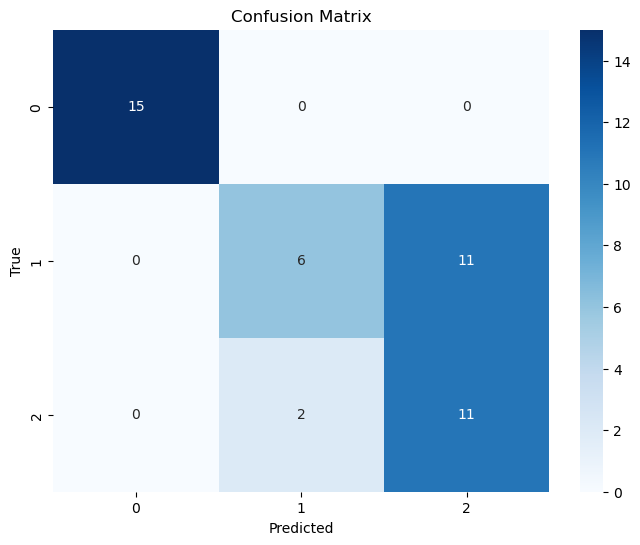

Resultat pour dataset wine
Résultat global sur le test set:
Accuracy: 0.5635018495684341
Précision: 0.5481739173805159
Rappel: 0.5491789714867618
F1-score: 0.5486759841743336



Résultat par class sur le test set:
Class 0:
Accuracy: 0.6171079429735234
Precision: 0.6460554371002132
Recall: 0.6171079429735234
F1-score: 0.63125

Class 1:
Accuracy: 0.48125
Precision: 0.4502923976608187
Recall: 0.48125
F1-score: 0.4652567975830816


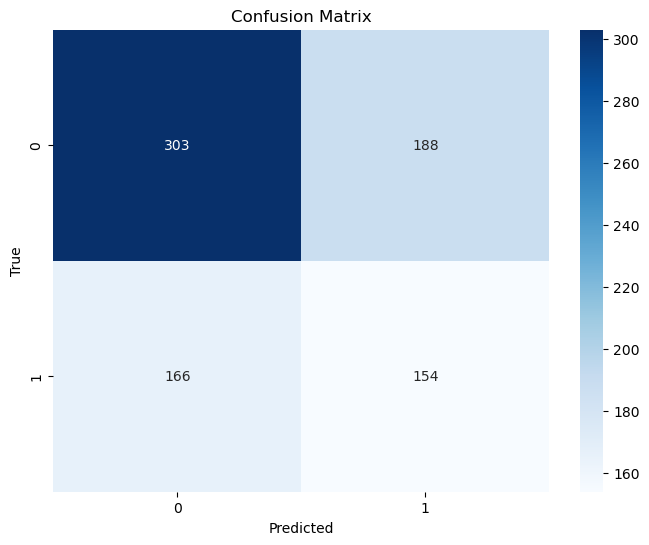

Resultat pour dataset abalone
Résultat global sur le test set:
Accuracy: 0.726475279106858
Précision: 0.31872160628957463
Rappel: 0.35194112788165505
F1-score: 0.3345086460974192



Résultat par class sur le test set:
Class 0:
Accuracy: 0.13043478260869565
Precision: 0.1836734693877551
Recall: 0.13043478260869565
F1-score: 0.15254237288135594

Class 1:
Accuracy: 0.9253886010362694
Precision: 0.7724913494809689
Recall: 0.9253886010362694
F1-score: 0.8420556341348421

Class 2:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


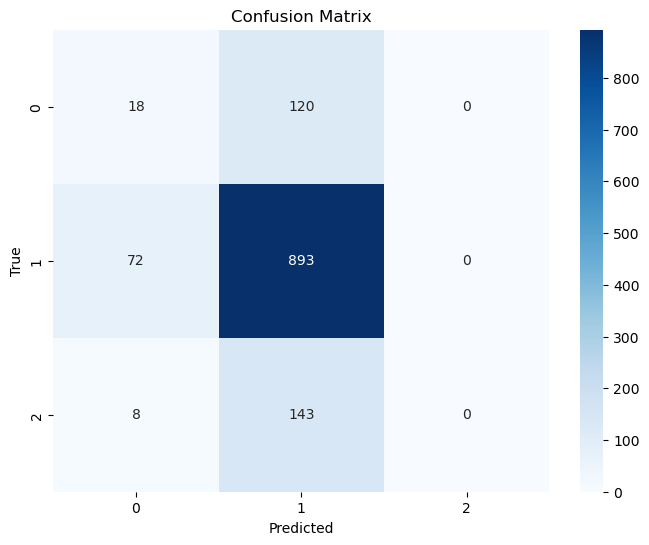

In [16]:
for name, dataset in datasets.items():
    dTree = DecisionTree.DecisionTree(max_depth, min_samples_split=min_samples_split, )

    train, train_labels, test, test_labels, labels = dataset
    train, train_labels = dTree.fit_transform(train.astype(float), train_labels.astype(float))
    test, test_labels = dTree.transform(test.astype(float), test_labels.astype(float))

    dTree.train(train, train_labels)

    conf_matrix, accuracy, precision, recall, f1_score = dTree.evaluate(test, test_labels)

    print(f"Resultat pour dataset {name}")
    print("Résultat global sur le test set:")
    print("Accuracy:", accuracy)
    print("Précision:", precision)
    print("Rappel:", recall)
    print("F1-score:", f1_score)
    print("\n\n")

    print("Résultat par class sur le test set:")
    helpers.print_metric_per_class(conf_matrix)

    helpers.plot_confusion_matrix(conf_matrix, labels)

## 1-b,c Avec Sklearn


Resultat pour dataset iris
Résultat global sur le test set:
Accuracy: 0.9
Précision: 0.9333333333333332
Rappel: 0.8888888888888888
F1-score: 0.9105691056910569



Résultat par class sur le test set:
Class 0:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Class 1:
Accuracy: 0.6666666666666666
Precision: 1.0
Recall: 0.6666666666666666
F1-score: 0.8

Class 2:
Accuracy: 1.0
Precision: 0.8
Recall: 1.0
F1-score: 0.888888888888889


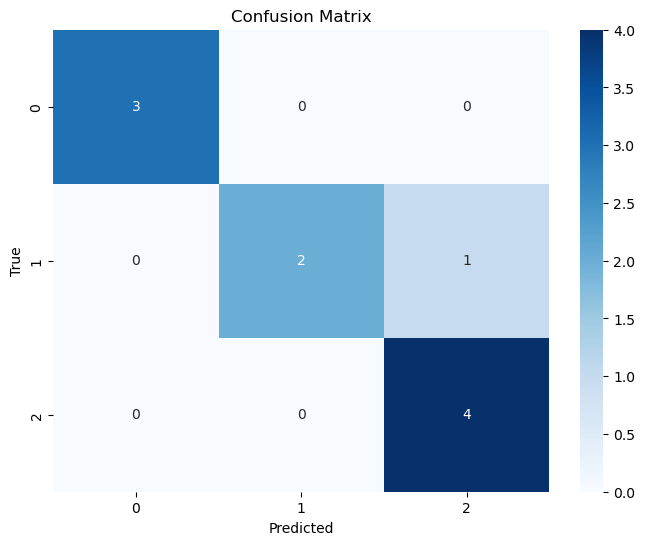

Resultat pour dataset wine
Résultat global sur le test set:
Accuracy: 0.6570588235294118
Précision: 0.6401358514015425
Rappel: 0.5996592547797367
F1-score: 0.6192368169472575



Résultat par class sur le test set:
Class 0:
Accuracy: 0.861969111969112
Precision: 0.6699174793698425
Recall: 0.861969111969112
F1-score: 0.7539046010975096

Class 1:
Accuracy: 0.3373493975903614
Precision: 0.6103542234332425
Recall: 0.3373493975903614
F1-score: 0.43452958292919497


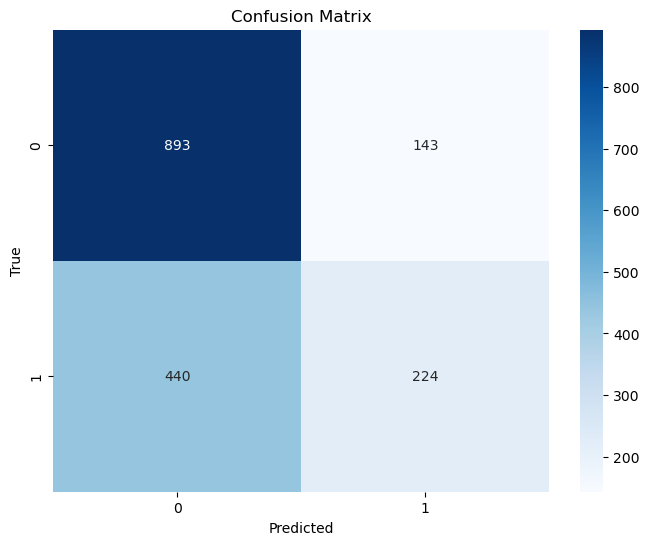

Resultat pour dataset abalone
Résultat global sur le test set:
Accuracy: 0.7653992395437262
Précision: 0.32308885838753953
Rappel: 0.33854407239652634
F1-score: 0.33063595469724294



Résultat par class sur le test set:
Class 0:
Accuracy: 0.035211267605633804
Precision: 0.19230769230769232
Recall: 0.035211267605633804
F1-score: 0.05952380952380953

Class 1:
Accuracy: 0.9804209495839452
Precision: 0.7769588828549263
Recall: 0.9804209495839452
F1-score: 0.8669119238260117

Class 2:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


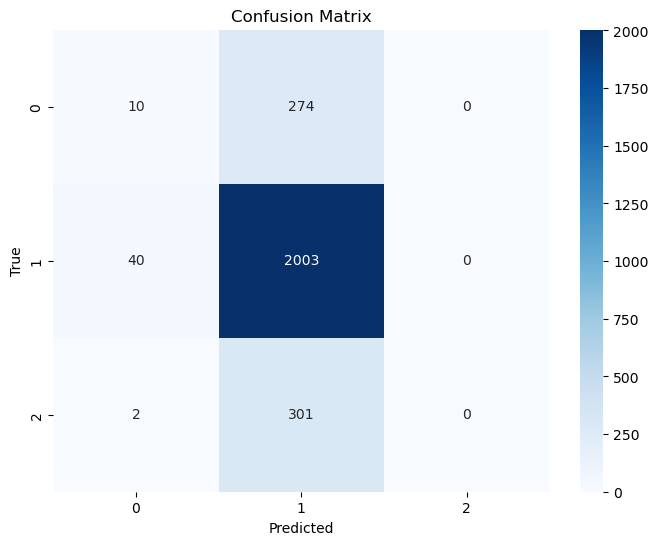

In [17]:

for name, dataset in datasets.items():
    dTree = DecisionTree.DecisionTree(max_depth, min_samples_split=min_samples_split, sklearn=True)

    train, train_labels, test, test_labels, labels = dataset
    train, train_labels = dTree.fit_transform(train.astype(float), train_labels.astype(float))
    test, test_labels = dTree.transform(test.astype(float), test_labels.astype(float))

    X_train, X_test, y_train, y_test = helpers.train_test_split(train, train_labels, test_size=best_test_size[name], random_state=seed)
    dTree.train(X_train, y_train)

    conf_matrix, accuracy, precision, recall, f1_score = dTree.evaluate(X_test, y_test)

    print(f"Resultat pour dataset {name}")
    print("Résultat global sur le test set:")
    print("Accuracy:", accuracy)
    print("Précision:", precision)
    print("Rappel:", recall)
    print("F1-score:", f1_score)
    print("\n\n")

    print("Résultat par class sur le test set:")
    helpers.print_metric_per_class(conf_matrix)

    helpers.plot_confusion_matrix(conf_matrix, labels)

## 1-a Avec Elagage


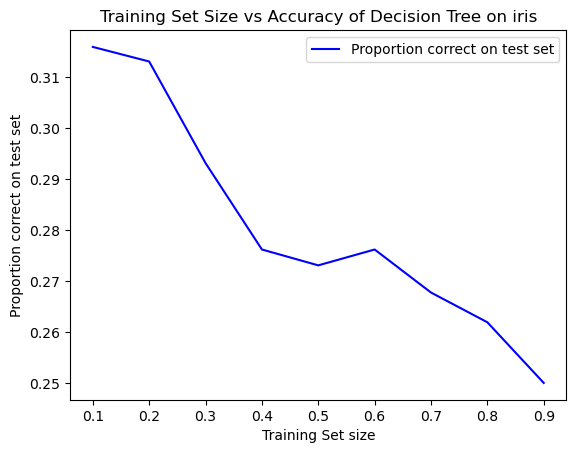

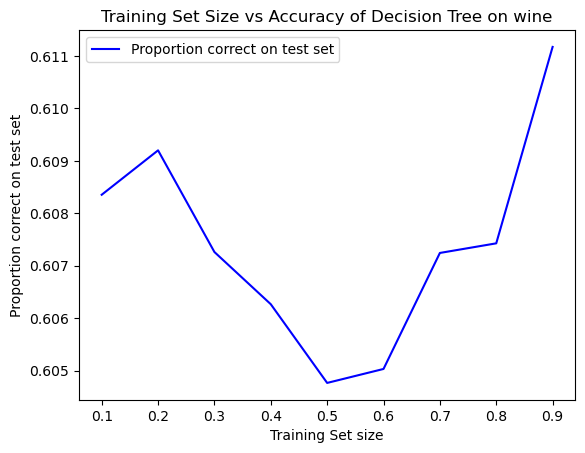

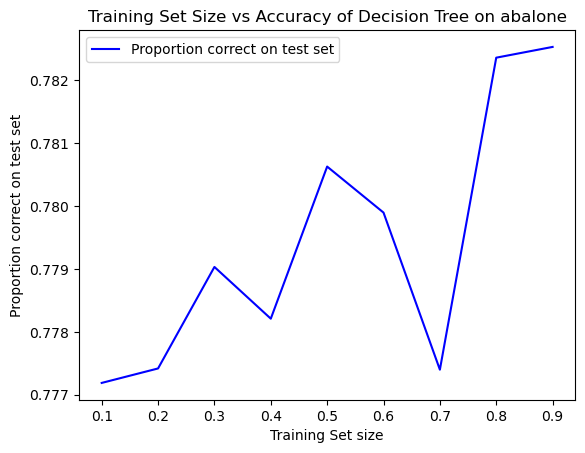

In [18]:
best_test_size = {}
for name, dataset in datasets.items():
    dTree = DecisionTree.DecisionTree(max_depth, min_samples_split=min_samples_split, prunning=True)

    train, train_labels, test, test_labels, labels = dataset
    train, train_labels = dTree.fit_transform(train.astype(float), train_labels.astype(float))
    test, test_labels = dTree.transform(test.astype(float), test_labels.astype(float))

    accuracies = []
    test_size = []
    for size in range(1, 10):
        accuracy = []
        for seed in range(seedrange):

            X_train, X_test, y_train, y_test = helpers.train_test_split(train, train_labels, test_size=0.1 * size, random_state=seed)
            dTree.train(X_train, y_train)

            scores = dTree.evaluate(X_test, y_test)
            accuracy.append(scores[1])

        accuracies.append(np.mean(accuracy))
        test_size.append(1 - (0.1 * size))
    #
    helpers.plot(
         test_size,
         accuracies,
         xlabel="Training Set size",
         ylabel="Proportion correct on test set",
         title=f"Training Set Size vs Accuracy of Decision Tree on {name}"
    )

    best_test_size[name] = test_size[accuracies.index(max(accuracies))]


## 1-b,c Training avec Elagage


Resultat pour dataset iris
Résultat global sur le test set:
Accuracy: 0.28888888888888886
Précision: 0.09629629629629628
Rappel: 0.3333333333333333
F1-score: 0.14942528735632182



Résultat par class sur le test set:
Class 0:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0

Class 1:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0

Class 2:
Accuracy: 1.0
Precision: 0.28888888888888886
Recall: 1.0
F1-score: 0.4482758620689655


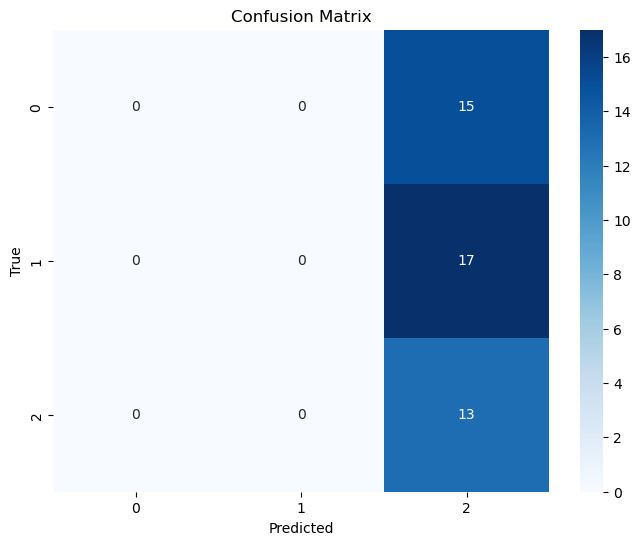

Resultat pour dataset wine
Résultat global sur le test set:
Accuracy: 0.6054254007398274
Précision: 0.3027127003699137
Rappel: 0.5
F1-score: 0.3771121351766513



Résultat par class sur le test set:
Class 0:
Accuracy: 1.0
Precision: 0.6054254007398274
Recall: 1.0
F1-score: 0.7542242703533026

Class 1:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


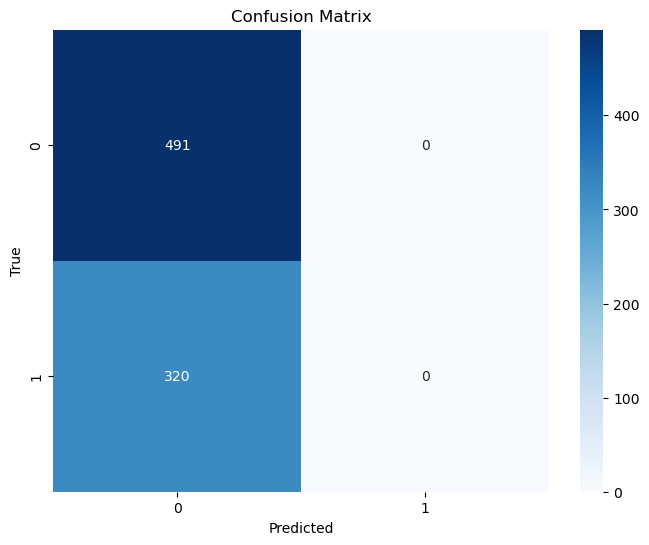

Resultat pour dataset abalone
Résultat global sur le test set:
Accuracy: 0.7695374800637959
Précision: 0.25651249335459864
Rappel: 0.3333333333333333
F1-score: 0.28992038455760855



Résultat par class sur le test set:
Class 0:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0

Class 1:
Accuracy: 1.0
Precision: 0.7695374800637959
Recall: 1.0
F1-score: 0.8697611536728256

Class 2:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


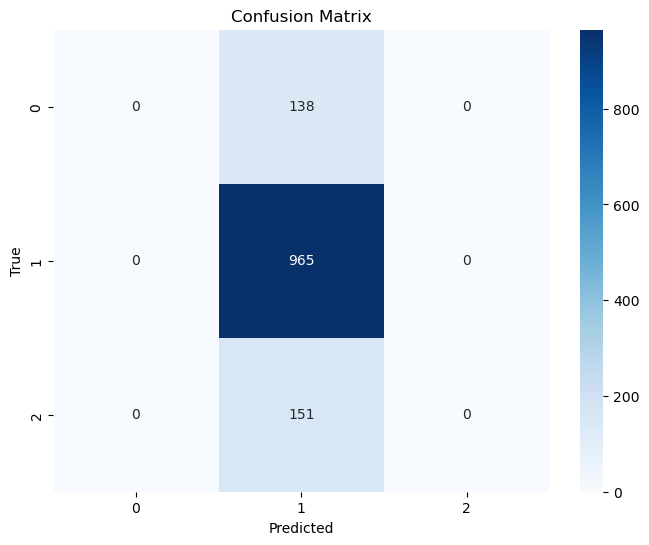

In [19]:
for name, dataset in datasets.items():
    dTree = DecisionTree.DecisionTree(max_depth, prunning=True)

    train, train_labels, test, test_labels, labels = dataset
    train, train_labels = dTree.fit_transform(train.astype(float), train_labels.astype(float))
    test, test_labels = dTree.transform(test.astype(float), test_labels.astype(float))

    dTree.train(train, train_labels)

    conf_matrix, accuracy, precision, recall, f1_score = dTree.evaluate(test, test_labels)

    print(f"Resultat pour dataset {name}")
    print("Résultat global sur le test set:")
    print("Accuracy:", accuracy)
    print("Précision:", precision)
    print("Rappel:", recall)
    print("F1-score:", f1_score)
    print("\n\n")

    print("Résultat par class sur le test set:")
    helpers.print_metric_per_class(conf_matrix)

    helpers.plot_confusion_matrix(conf_matrix, labels)


# Reseau de neurones

In [1]:

#importer d'autres fichiers et classes si vous en avez développés

In [2]:
hidden_size = 100
num_layer = 1
activation_function = helpers.sigmoid
output_activation_function = helpers.sigmoid
learning_rate = 1e-2
epochs = 10
hidden_size_range = (10, 50, 100, 300)
depths = (2, 5, 7, 10)
dataset_names = ['iris', 'wine', 'abalone']
train_size = .7


datasets = helpers.dataset_loader(dataset_names, train_ratio=train_size)


## 2-c,d Entrainement et Evaluation

In [ ]:
for name, dataset in datasets.items():
    train, train_labels, test, test_labels, labels = dataset

    input_size = train.shape[1]
    output_size = 1 if len(labels) == 2 else len(labels)
    output_activation_function = helpers.sigmoid if output_size == 1 else helpers.softmax
    loss_function = helpers.binary_cross_entropy_loss if output_size == 1 else helpers.categorical_cross_entropy_loss
    mlp = NeuralNet.NeuralNet(input_size, hidden_size, output_size, activation_function, output_activation_function, n_layer=num_layer, dataset=name)
    print(mlp)

    train, train_labels = mlp.fit_transform(train.astype(float), train_labels.astype(int))
    test, test_labels = mlp.transform(test.astype(float), test_labels.astype(int))
    
    X_train, X_test, y_train, y_test = helpers.train_test_split(train, train_labels, test_size=0.2, random_state=42)
    losses, train_labels, train_predicted, test_predicted = mlp.train(X_train, y_train, X_test, loss_function, learning_rate=learning_rate, epochs=epochs)

    train_accuracy, train_f1_score = [], []
    test_accuracy, test_f1_score = [], []
    for label, predicted, test_pred in zip(train_labels, train_predicted, test_predicted):
        train_accuracy.append(helpers.accuracy_score(label, predicted))
        test_accuracy.append(helpers.accuracy_score(y_test, test_pred))
        train_f1_score.append(helpers.f1_score(label, predicted))
        test_f1_score.append(helpers.f1_score(y_test, test_pred))

    helpers.plot_train_test(range(epochs), (train_accuracy, test_accuracy), title="Accuracy - Train vs Test")
    helpers.plot_train_test(range(epochs), (train_f1_score, test_f1_score), title="F1-score - Train vs Test")

    conf_matrix, accuracy, precision, recall, f1_score = mlp.evaluate(test, test_labels)
    print("Résultat global sur le test set:")
    print("Accuracy:", accuracy)
    print("Précision:", precision)
    print("Rappel:", recall)
    print("F1-score:", f1_score)
    print("\n\n")

    print("Résultat par class sur le test set:")
    helpers.print_metric_per_class(conf_matrix)

    helpers.plot_confusion_matrix(conf_matrix, labels)



## 2.1.1 - Choix du nombre de neurones dans la couche cachée

In [ ]:
optimal_hidden_sizes = {}
hidden_size_range = (5, 10, 50, 100, 300, 500, 1000, 2000, 5000)

for name, dataset in datasets.items():
    train, train_labels, test, test_labels, labels = dataset

    input_size = train.shape[1]
    output_size = 1 if len(labels) == 2 else len(labels)
    output_activation_function = helpers.sigmoid if output_size == 1 else helpers.softmax
    loss_function = helpers.binary_cross_entropy_loss if output_size == 1 else helpers.categorical_cross_entropy_loss
    mlp = NeuralNet.NeuralNet(input_size, hidden_size, output_size, activation_function, output_activation_function, n_layer=num_layer, dataset=name)
    # print(mlp)
    
    train, train_labels = mlp.fit_transform(train.astype(float), train_labels.astype(int))
    test, test_labels = mlp.transform(test.astype(float), test_labels.astype(int))
    
    epochs = 100
    kfold = 10
    optimal_hidden_size , errors = mlp.optimal_hidden_size(train, train_labels, k=kfold, sizes=hidden_size_range, learning_rate=learning_rate, epoch=kfold)
    helpers.plot(hidden_size_range, errors, title="Hidden Size search", xlabel="Hidden size", ylabel="Errors rate")
    print(f"Taille optimale des couches cachees pour {name}", optimal_hidden_size)
    optimal_hidden_sizes[name] = optimal_hidden_size



## 2.1.2 Choix du nombre de couches cachées

In [ ]:
optimal_depths = {}
depths = range(2, 20, 1)
for name, dataset in datasets.items():
    train, train_labels, test, test_labels, labels = dataset

    input_size = train.shape[1]
    output_size = 1 if len(labels) == 2 else len(labels)
    output_activation_function = helpers.sigmoid if output_size == 1 else helpers.softmax
    loss_function = helpers.binary_cross_entropy_loss if output_size == 1 else helpers.categorical_cross_entropy_loss
    mlp = NeuralNet.NeuralNet(input_size, hidden_size, output_size, activation_function, output_activation_function, n_layer=num_layer, dataset=name)
    # print(mlp)
    
    train, train_labels = mlp.fit_transform(train.astype(float), train_labels.astype(int))
    test, test_labels = mlp.transform(test.astype(float), test_labels.astype(int))

    optimal_depth , errors = mlp.optimal_depth(train, train_labels, hidden_size=optimal_hidden_sizes[name], k=kfold, depths=depths, learning_rate=learning_rate, epoch=kfold)
    helpers.plot(depths, errors, title="Number of Layer search", xlabel="Number of layer", ylabel="Errors rate")
    print("Nombre optimale de couches cachees ", optimal_depth)
    optimal_depths[name] = optimal_depth

In [ ]:
print(optimal_hidden_sizes)
print(optimal_depths)

## Entraı̂nement et Test

In [ ]:

for name, dataset in datasets.items():
    train, train_labels, test, test_labels, labels = dataset

    input_size = train.shape[1]
    output_size = 1 if len(labels) == 2 else len(labels)
    output_activation_function = helpers.sigmoid if output_size == 1 else helpers.softmax
    loss_function = helpers.binary_cross_entropy_loss if output_size == 1 else helpers.categorical_cross_entropy_loss

    
    mlp = NeuralNet.NeuralNet(input_size, optimal_hidden_sizes[name], output_size, activation_function, output_activation_function, n_layer=optimal_depths[name], dataset=name)
    print(mlp)
    
    train, train_labels = mlp.fit_transform(train.astype(float), train_labels.astype(int))
    test, test_labels = mlp.transform(test.astype(float), test_labels.astype(int))
    
    
    X_train, X_test, y_train, y_test = helpers.train_test_split(train, train_labels, test_size=0.2, random_state=42)
    losses, train_labels, train_predicted, test_predicted = mlp.train(X_train, y_train, X_test, loss_function, learning_rate=learning_rate, epochs=epochs)

    train_accuracy, train_f1_score = [], []
    test_accuracy, test_f1_score = [], []
    for label, predicted, test_pred in zip(train_labels, train_predicted, test_predicted):
        train_accuracy.append(helpers.accuracy_score(label, predicted))
        test_accuracy.append(helpers.accuracy_score(y_test, test_pred))
        train_f1_score.append(helpers.f1_score(label, predicted))
        test_f1_score.append(helpers.f1_score(y_test, test_pred))

    helpers.plot_train_test(range(epochs), (train_accuracy, test_accuracy), title="Accuracy - Train vs Test")
    helpers.plot_train_test(range(epochs), (train_f1_score, test_f1_score), title="F1-score - Train vs Test")

    conf_matrix, accuracy, precision, recall, f1_score = mlp.evaluate(test, test_labels)
    print("Résultat global sur le test set:")
    print("Accuracy:", accuracy)
    print("Précision:", precision)
    print("Rappel:", recall)
    print("F1-score:", f1_score)
    print("\n\n")

    print("Résultat par class sur le test set:")
    helpers.print_metric_per_class(conf_matrix)

    helpers.plot_confusion_matrix(conf_matrix, labels)
